## Tabular data
Processing tabular data using numpy

In [1]:
import numpy,os

In [2]:
help(numpy.genfromtxt)
# delimiter skip_header - 2 arguments that we need to focus on

Help on function genfromtxt in module numpy:

genfromtxt(fname, dtype=<class 'float'>, comments='#', delimiter=None, skip_header=0, skip_footer=0, converters=None, missing_values=None, filling_values=None, usecols=None, names=None, excludelist=None, deletechars=None, replace_space='_', autostrip=False, case_sensitive=True, defaultfmt='f%i', unpack=None, usemask=False, loose=True, invalid_raise=True, max_rows=None, encoding='bytes')
    Load data from a text file, with missing values handled as specified.
    
    Each line past the first `skip_header` lines is split at the `delimiter`
    character, and characters following the `comments` character are discarded.
    
    Parameters
    ----------
    fname : file, str, pathlib.Path, list of str, generator
        File, filename, list, or generator to read.  If the filename
        extension is `.gz` or `.bz2`, the file is first decompressed. Note
        that generators must return byte strings in Python 3k.  The strings
        in a 

In [3]:
distance_file = os.path.join('data','distance_data_headers.csv')
distances = numpy.genfromtxt(fname=distance_file,delimiter=',',dtype='unicode')
# dtype='unicode' - To keep everything as words and strings
# if not numpy.genfromtxt function, we should use the general function 'open' and 'readlines'
print(distances)

[['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']
 ['1' '8.9542' '5.8024' '11.5478' '9.9557']
 ['2' '8.6181' '6.0942' '13.9594' '11.6945']
 ...
 ['9998' '8.6625' '7.7306' '9.5469' '10.3063']
 ['9999' '9.2456' '7.8886' '9.8151' '10.7564']
 ['10000' '8.8135' '7.917' '9.9517' '10.7848']]


In [4]:
type(distances)
# This looks like a list, but actually a Numpy array.

numpy.ndarray

In [5]:
headers = distances[0]
# headers: Frame THR4_ATP THR4_ASP TYR6_ATP TYR6_ASP
print(headers)

['Frame' 'THR4_ATP' 'THR4_ASP' 'TYR6_ATP' 'TYR6_ASP']


In [6]:
# Slice distances to get the numerical values (everything but the headers)
distances_data = distances[1:]
distances_data
# This shows the difference between print function and direct output
# direct output with 'array' type and dtype indication

array([['1', '8.9542', '5.8024', '11.5478', '9.9557'],
       ['2', '8.6181', '6.0942', '13.9594', '11.6945'],
       ['3', '9.0066', '6.0637', '13.0924', '11.3043'],
       ...,
       ['9998', '8.6625', '7.7306', '9.5469', '10.3063'],
       ['9999', '9.2456', '7.8886', '9.8151', '10.7564'],
       ['10000', '8.8135', '7.917', '9.9517', '10.7848']], dtype='<U8')

In [7]:
data = distances_data.astype(numpy.float)
print(data)

[[1.00000e+00 8.95420e+00 5.80240e+00 1.15478e+01 9.95570e+00]
 [2.00000e+00 8.61810e+00 6.09420e+00 1.39594e+01 1.16945e+01]
 [3.00000e+00 9.00660e+00 6.06370e+00 1.30924e+01 1.13043e+01]
 ...
 [9.99800e+03 8.66250e+00 7.73060e+00 9.54690e+00 1.03063e+01]
 [9.99900e+03 9.24560e+00 7.88860e+00 9.81510e+00 1.07564e+01]
 [1.00000e+04 8.81350e+00 7.91700e+00 9.95170e+00 1.07848e+01]]


In [10]:
# To slice a 2D
# array_name[row_index,column_index]
print(data[0,1])
print(data[1,0])

8.9542
2.0


In [11]:
small_data = data[0:10,0:3]

In [12]:
print(small_data[:,1:])

[[8.9542 5.8024]
 [8.6181 6.0942]
 [9.0066 6.0637]
 [9.2002 6.0227]
 [9.1294 5.9365]
 [9.0462 6.2553]
 [8.8657 5.9186]
 [9.3256 6.2351]
 [9.4184 6.1993]
 [9.06   6.0478]]


In [13]:
# data_average = numpy.mean(data_set)
thr4_atp = data[:,1]
avg_thr4_atp = numpy.mean(thr4_atp)
print(avg_thr4_atp)

10.876950930000001


In [14]:
# Change a number in the for loop to calculate the average value of each column
# range function - range(a,b[,step]) - integers in interval [a,b) with step size 'step'
# Create a variable called num-columns which is the number of columns in our data
num_columns = len(headers)
print(num_columns)

5


In [20]:
for i in range(1,num_columns):
    # Skip the first column 'Frame'
    column = data[:,i]
    avg_col = numpy.mean(column)
    data_label = headers[i]
    print(F'{data_label} : {avg_col:.3f}')

THR4_ATP : 10.877
THR4_ASP : 7.342
TYR6_ATP : 11.210
TYR6_ASP : 10.993


## Plotting
Plotting data using matplotlib

In [21]:
import matplotlib.pyplot as plt
# Define a shortcut for matplotlib.pyplot
# I can type less if I wanna use one of the functions in the library

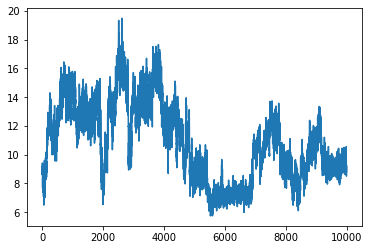

In [22]:
plt.figure() # Create a new figure
plt.plot(data[:,1]) # Plot a regular line plot
# This does not specify a Y-value, the default X-value is the counted indices

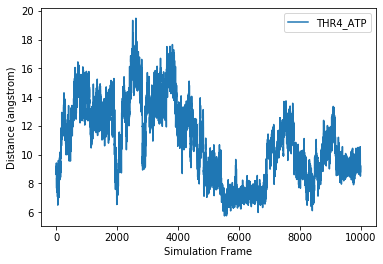

In [35]:
# Label the plot!!!
plt.figure()
sample_name = headers[1]
plt.xlabel('Simulation Frame')
plt.ylabel('Distance (angstrom)')
plt.plot(data[:,1],label=sample_name)
# plt.title('Title')
plt.legend()
# The argument label in plt.plot() function is just to label it implicitly but not to show
# where a plt.legend() function is necessary

plt.savefig(F'{sample_name}.png',dpi=300)
# Export a figure to the default directory
# dpi - resolution, e.g. dpi=300

In [27]:
help(plt.savefig)

Help on function savefig in module matplotlib.pyplot:

savefig(*args, **kwargs)
    Save the current figure.
    
    Call signature::
    
      savefig(fname, dpi=None, facecolor='w', edgecolor='w',
              orientation='portrait', papertype=None, format=None,
              transparent=False, bbox_inches=None, pad_inches=0.1,
              frameon=None, metadata=None)
    
    The output formats available depend on the backend being used.
    
    Parameters
    ----------
    
    fname : str or PathLike or file-like object
        A path, or a Python file-like object, or
        possibly some backend-dependent object such as
        `matplotlib.backends.backend_pdf.PdfPages`.
    
        If *format* is not set, then the output format is inferred from
        the extension of *fname*, if any, and from :rc:`savefig.format`
        otherwise.  If *format* is set, it determines the output format.
    
        Hence, if *fname* is not a path or has no extension, remember to
      

In [36]:
help(plt.plot)

Help on function plot in module matplotlib.pyplot:

plot(*args, scalex=True, scaley=True, data=None, **kwargs)
    Plot y versus x as lines and/or markers.
    
    Call signatures::
    
        plot([x], y, [fmt], *, data=None, **kwargs)
        plot([x], y, [fmt], [x2], y2, [fmt2], ..., **kwargs)
    
    The coordinates of the points or line nodes are given by *x*, *y*.
    
    The optional parameter *fmt* is a convenient way for defining basic
    formatting like color, marker and linestyle. It's a shortcut string
    notation described in the *Notes* section below.
    
    >>> plot(x, y)        # plot x and y using default line style and color
    >>> plot(x, y, 'bo')  # plot x and y using blue circle markers
    >>> plot(y)           # plot y using x as index array 0..N-1
    >>> plot(y, 'r+')     # ditto, but with red plusses
    
    You can use `.Line2D` properties as keyword arguments for more
    control on the appearance. Line properties and *fmt* can be mixed.
    The f

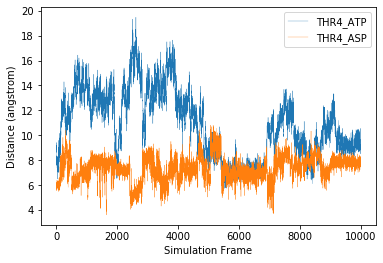

In [42]:
plt.figure()
plt.xlabel('Simulation Frame')
plt.ylabel('Distance (angstrom)')
plt.plot(data[:,1],label=headers[1],linewidth=0.3)
plt.plot(data[:,2],label=headers[2],linewidth=0.3)
plt.legend()
plt.savefig(F'two_samples.png',dpi=300)

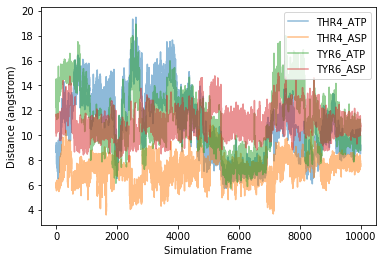

In [46]:
plt.figure()
plt.xlabel('Simulation Frame')
plt.ylabel('Distance (angstrom)')
for i in range(1,num_columns):
    plt.plot(data[:,i],label=headers[i],alpha=0.5)
plt.legend()
plt.savefig(F'all_samples.png',dpi=300)

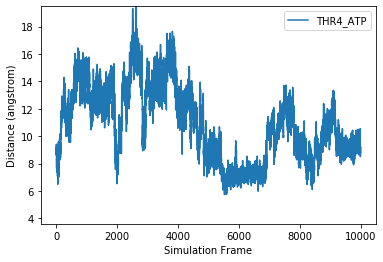

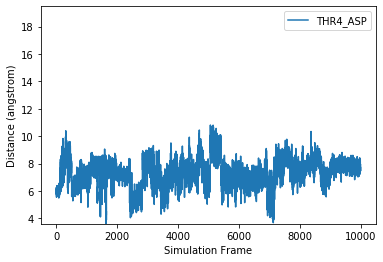

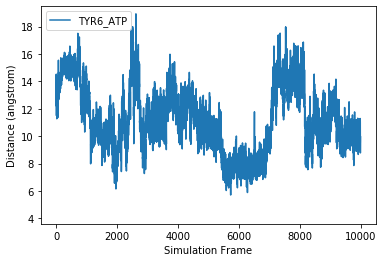

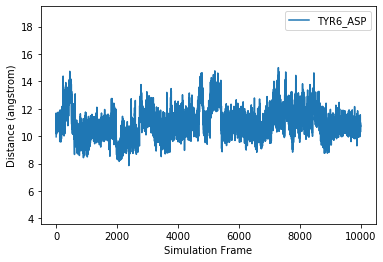

In [48]:
# Make a plot for each sample
# Try adding savefig with file name equal to sample name
data_min = numpy.min(data[:,1:])
data_max = numpy.max(data[:,1:])
# Determine the minimum and maximum of data assigned
for i in range(1,num_columns):
    plt.figure()
    sample_name = headers[i]
    plt.ylim(data_min,data_max)
    plt.xlabel('Simulation Frame')
    plt.ylabel('Distance (angstrom)')
    plt.plot(data[:,i],label=sample_name)
    plt.legend()
    plt.savefig(F'{sample_name}.png',dpi=300)

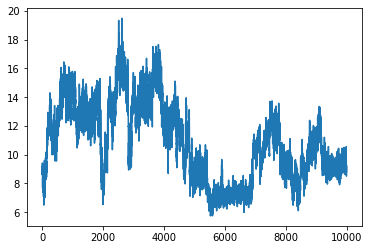

In [49]:
plt.figure()
plt.plot(data[:,0],data[:,1]) # Specify both X and Y values

In [50]:
data[:10:2,:]

array([[ 1.    ,  8.9542,  5.8024, 11.5478,  9.9557],
       [ 3.    ,  9.0066,  6.0637, 13.0924, 11.3043],
       [ 5.    ,  9.1294,  5.9365, 13.5321, 10.6279],
       [ 7.    ,  8.8657,  5.9186, 12.9312, 10.2176],
       [ 9.    ,  9.4184,  6.1993, 13.2614, 10.366 ]])

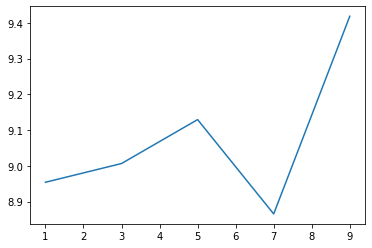

In [51]:
plt.figure()
plt.plot(data[:10:2,0],data[:10:2,1])

Text(0, 0.5, 'Distance (angstrom)')

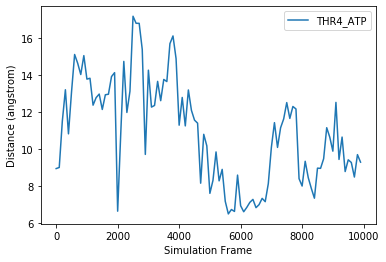

In [56]:
plt.figure()
plt.plot(data[::100,0],data[::100,1],label=headers[1])
plt.legend()
plt.xlabel('Simulation Frame')
plt.ylabel('Distance (angstrom)')